# Final Project-Group 5 Data Science Class

## Step 0: Dataset Description

The dataset gives a detailed view of sales transactions, including customer demographics (age, gender, location), product details, and financial metrics like cost, revenue, and profit. It supports analysis of purchasing behavior across demographic groups and trends over time based on product quantity sold. Containing both numeric and categorical data, it enables multi-level analysis by product, customer, and region using various visualization and statistical techniques. It has 13 columns and 34865 rows. 

## Step 1: Data Pipeline & Preparation

### 1.1. Data Acquisition

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from statsmodels.tsa.arima.model import ARIMA

from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [59]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(r"Group 5-Dataset for Final Project.csv")
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


### 1.2 Check Data Types

In [26]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34716 non-null  float64
 5   Customer Gender   34766 non-null  object 
 6   Country           34746 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34666 non-null  float64
 11  Unit Cost         34686 non-null  float64
 12  Unit Price        34706 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34567 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 4.0+ MB
None
index                 0
D

### 1.3. Handle Duplicates & Outliers

In [27]:
df.drop_duplicates(inplace=True)

for col in ['Quantity', 'Unit Cost', 'Unit Price', 'Revenue']:
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)
    df = df[(df[col] >= q_low) & (df[col] <= q_hi)]
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 32263 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             32263 non-null  int64  
 1   Date              32263 non-null  object 
 2   Year              32263 non-null  float64
 3   Month             32263 non-null  object 
 4   Customer Age      32130 non-null  float64
 5   Customer Gender   32171 non-null  object 
 6   Country           32152 non-null  object 
 7   State             32263 non-null  object 
 8   Product Category  32263 non-null  object 
 9   Sub Category      32263 non-null  object 
 10  Quantity          32263 non-null  float64
 11  Unit Cost         32263 non-null  float64
 12  Unit Price        32263 non-null  float64
 13  Cost              32263 non-null  float64
 14  Revenue           32263 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 3.9+ MB
None
index                 0
Date  

### 1.4 Fill the Missing Values

In [28]:
# Fill the missing values with the mean
df['Customer Age'] = df['Customer Age'].fillna(df['Customer Age'].mean())

### 1.5 Data Preparation Final Check

In [29]:
# 1. Check for Missing Values
print("Missing values in each column:")
print(df.isnull().sum())
print("\n")  # Add a new line for clarity

# 2. Check Data Types
print("Data types of each column:")
print(df.dtypes)
print("\n")

# 3. Summary Statistics
print("Summary statistics of the numerical columns:")
print(df.describe())
print("\n")

# 4. Check for Duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
print("\n")

# 5. Validate Categorical Columns (Example: Check 'Month' and 'Customer Gender_M')
print("Unique values in 'Month' column:")
print(df['Month'].unique())
print("\n")

print("Unique values in 'Customer Gender' column:")
print(df['Customer Gender'].unique())
print("\n")

# 6. Final Review of Data Integrity (Show brief summary of the first few rows)
print("Dataset shape (rows, columns):")
print(df.shape)
print("\n")

print("Summary of the first few rows (column names, non-null counts, data types):")
print(df.info())


Missing values in each column:
index                 0
Date                  0
Year                  0
Month                 0
Customer Age          0
Customer Gender      92
Country             111
State                 0
Product Category      0
Sub Category          0
Quantity              0
Unit Cost             0
Unit Price            0
Cost                  0
Revenue               0
dtype: int64


Data types of each column:
index                 int64
Date                 object
Year                float64
Month                object
Customer Age        float64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity            float64
Unit Cost           float64
Unit Price          float64
Cost                float64
Revenue             float64
dtype: object


Summary statistics of the numerical columns:
              index          Year  Customer Age      Quantity     Unit Cost    Unit Pr

#### Data Preparation Narrative Conclusion

Based on the above critical checks for missing values, data types, duplicates, and column cleanliness, our dataset looks clean and ready for analysis. The following will be the exploration data analysis. 

## Step 2: Exploratory Data Analysis (EDA)

### 2.1 Descriptive Statistics

In [30]:
df.drop(columns=['Year']).select_dtypes(include=np.number).describe()


,index,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
count,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000
mean,17475.554257,36.360162,2.011158,324.760354,358.557486,548.628522,605.543037
std,10063.468475,11.099488,0.811737,431.737655,445.782564,642.629444,661.642055
min,0.000000,17.000000,1.000000,3.670000,5.666667,9.000000,14.000000
25%,8745.500000,28.000000,1.000000,48.000000,58.000000,90.000000,110.000000
50%,17525.000000,35.000000,2.000000,151.670000,181.000000,264.000000,323.000000
75%,26182.500000,44.000000,3.000000,420.000000,497.416667,769.000000,868.000000
max,34865.000000,87.000000,3.000000,2384.000000,2480.000000,2443.000000,2760.000000


### 2.2. Visuals

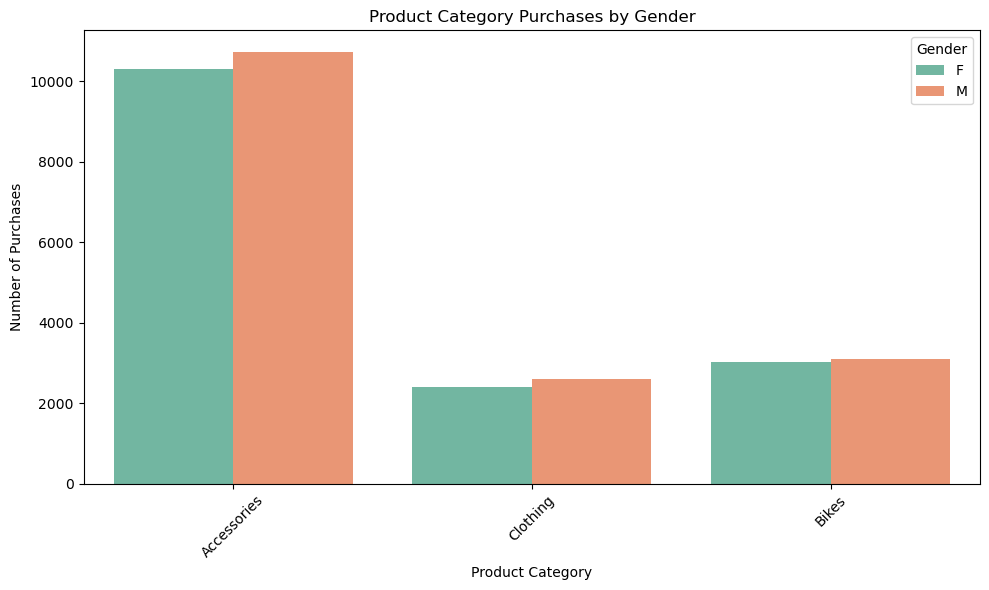

In [54]:
# Product Category Purchases by Gender

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product Category', hue='Customer Gender', palette='Set2')
plt.title('Product Category Purchases by Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

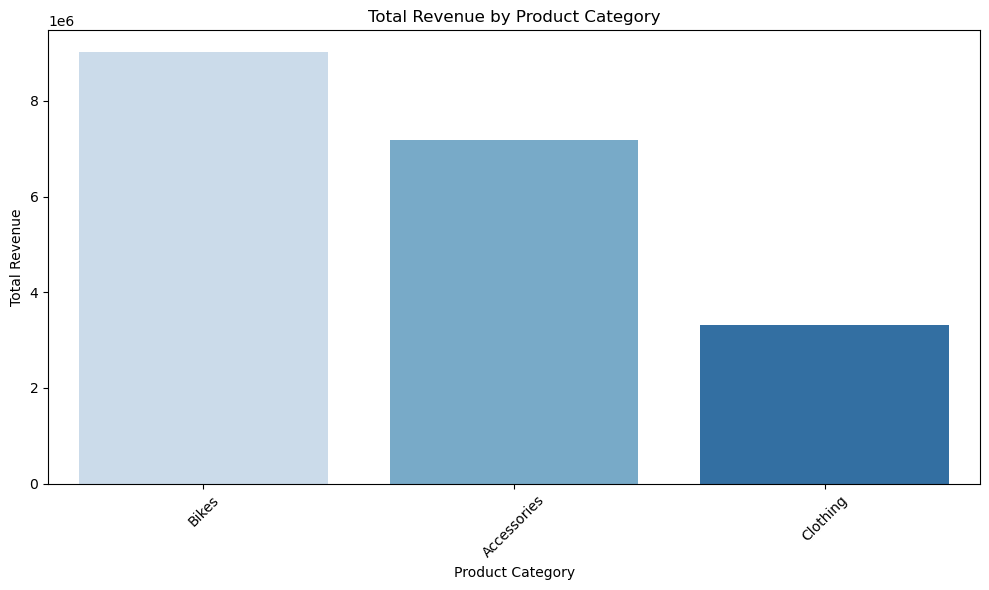

In [57]:
# Revenue by Product Category

category_revenue = df.groupby('Product Category')['Revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_revenue, x='Product Category', y='Revenue', palette='Blues', hue='Product Category')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

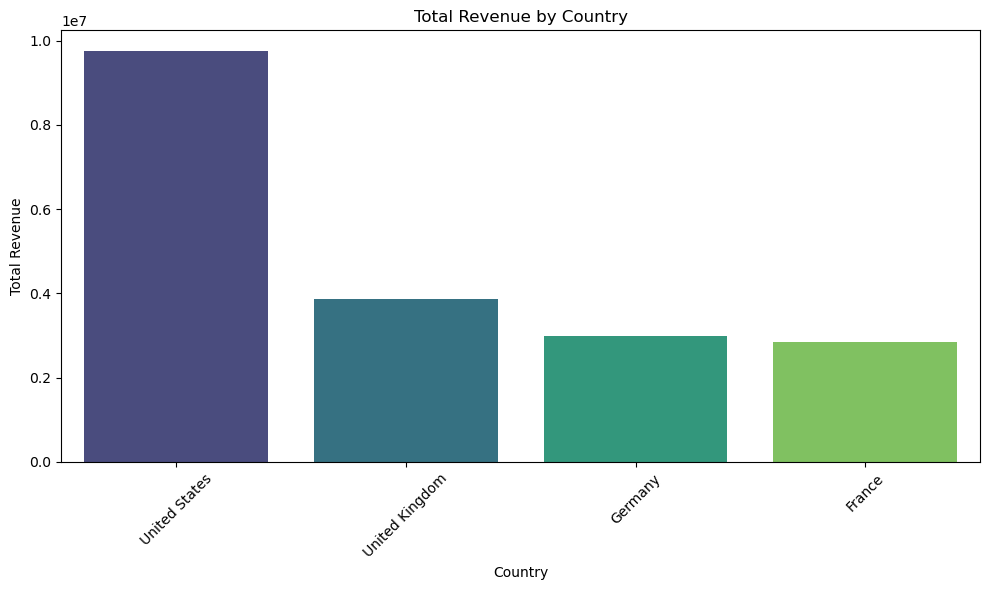

In [46]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=country_revenue, x='Country', y='Revenue', palette='viridis', hue='Country', legend=False)
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

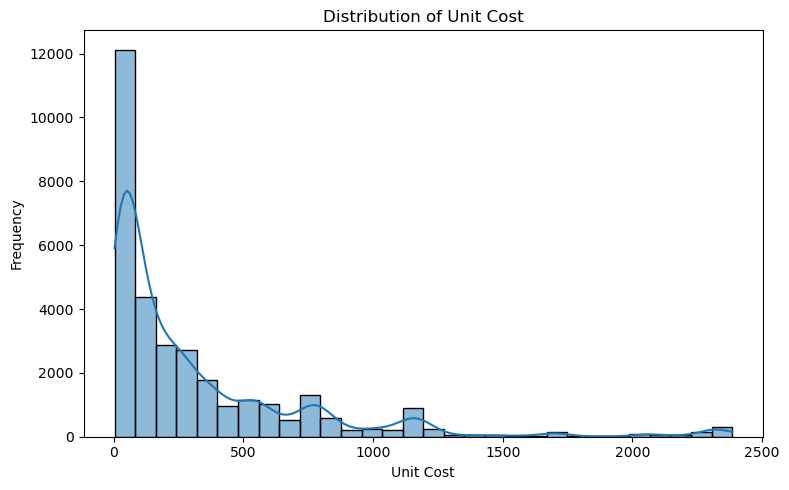

In [52]:
# Histogram distribution of Unit Cost

plt.figure(figsize=(8, 5))
sns.histplot(df['Unit Cost'], bins=30, kde=True)
plt.title('Distribution of Unit Cost')
plt.xlabel('Unit Cost')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

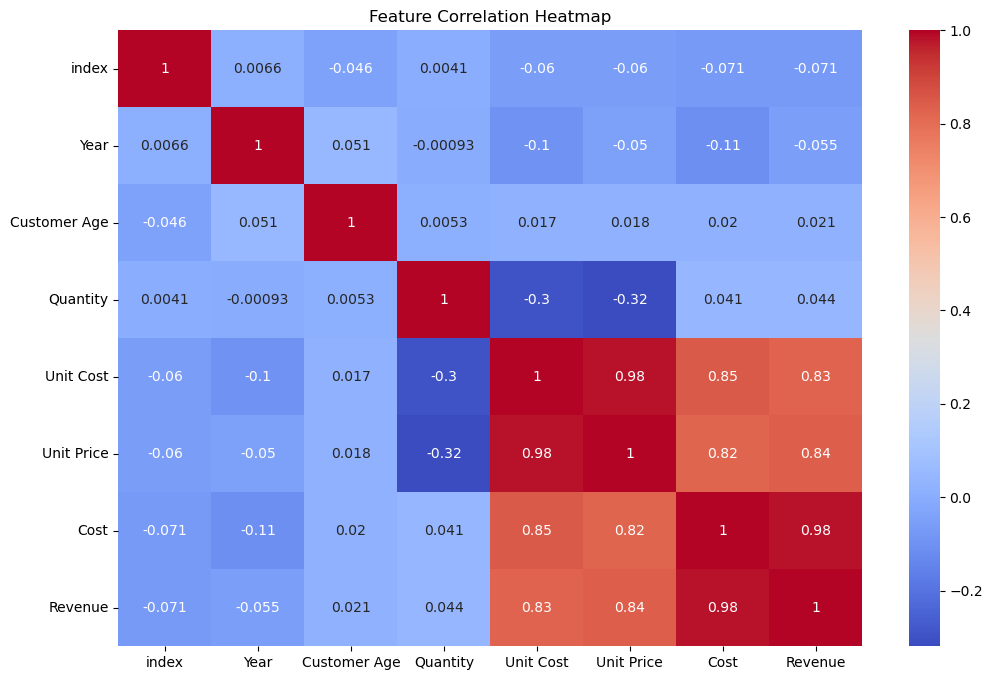

In [50]:
# Correlation heatmap (only on numeric columns)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()